In [1131]:
%load_ext autoreload
%autoreload 2
import numpy as np
from juno import utils
from pprint import pprint
from juno.juno_custom.elements.Herschel.structures import HerschelSettings, HerschelSimSettings

from juno.juno_custom.tools import sim_tools
import juno.juno_custom.elements.Herschel.utils as h_utils
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1132]:
config = utils.load_yaml_config(config_filename=r'C:\Users\User\Github\juno\juno\juno_custom\config.yaml')
settings = HerschelSettings.from_dict(config.get('HerschelSettings'))
sim_settings = HerschelSimSettings.from_dict(config.get('HerschelSimSettings'))
wavelength = sim_settings.wavelength
pixel_size= wavelength * 0.5

In [1133]:
settings.calculate_radii(pixel_size=pixel_size)
raw_profiles = h_utils.create_raw_profiles(settings)
profiles = h_utils.calculate_profiles(settings, raw_profiles, pixel_size)
lenses = h_utils.generate_lenses(settings, profiles)
padded_lenses = h_utils.calculate_padding(profiles=profiles, lenses=lenses, settings=settings, sim_settings=sim_settings, pixel_size=pixel_size)

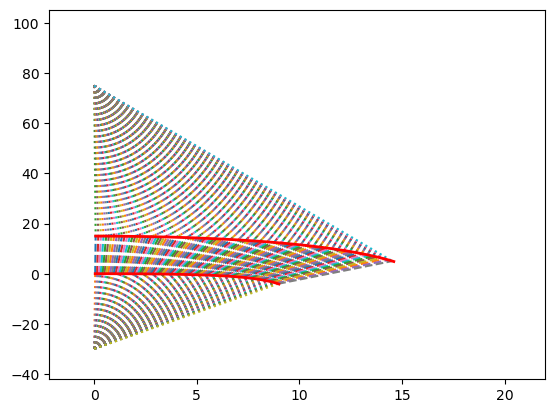

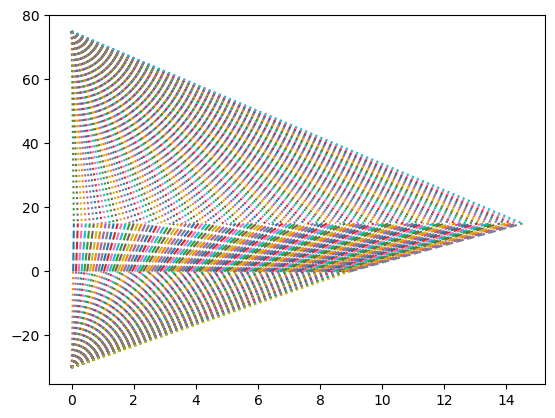

In [1134]:
h_utils.display_ray_tracing(settings, raw_profiles, 1.405)

In [1135]:
raw_profiles.x_first[-1]
raw_profiles.x_second[-1]

14.59482455864862

In [1136]:
sim_lens, sim_lens_padding = sim_tools.generate_sim_lens(settings, sim_settings, pixel_size)
sim_lens.profile = sim_lens.profile.max() - sim_lens.profile
sim_wavefront = sim_tools.generate_sim_wavefront(sim_lens=sim_lens, sim_lens_padding=sim_lens_padding, settings=settings, sim_settings=sim_settings)

In [1137]:
start = -settings.z_medium_o * 0.95
stop = -settings.z_medium_o * 1.05
start = -settings.z_medium_o * 0
stop = -settings.z_medium_o * 2
start = -settings.z_medium_o * -1#-1.1
stop = -settings.z_medium_o * 0

step = (stop-start)/(20-1)
distances = np.arange(start, stop, step)
distances = np.append(distances, stop)
output, propagation, output_array = sim_tools.propagate_zero_lens(wavefront=sim_wavefront, 
                                                settings=settings,
                                                sim_settings=sim_settings, 
                                                distances=distances,
                                                pixel_size=pixel_size)

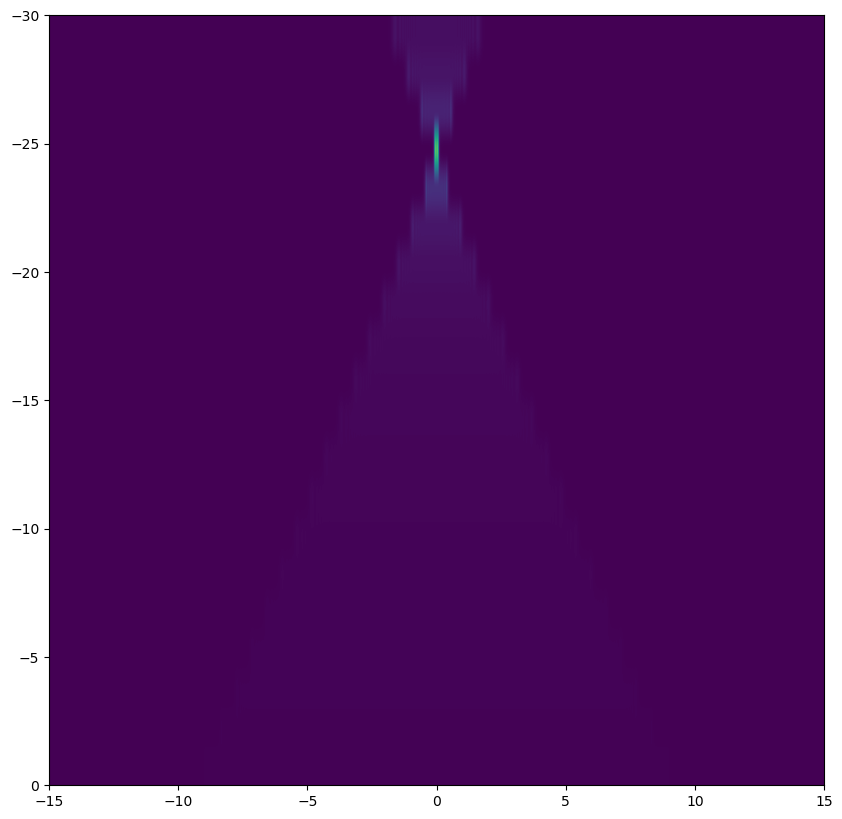

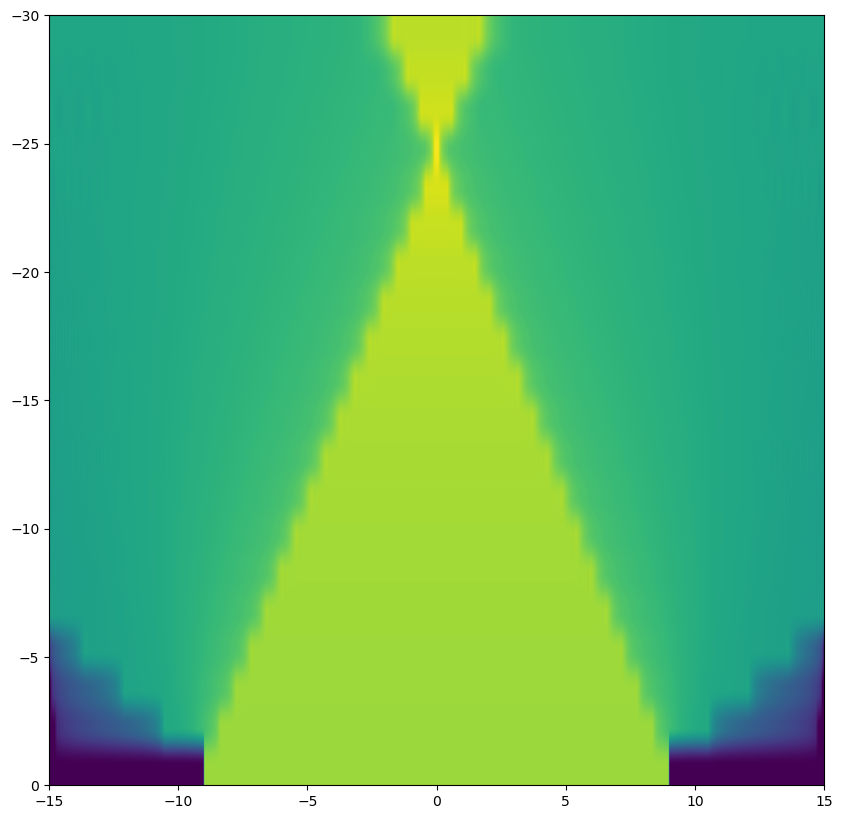

In [1138]:
extent = [-output_array.shape[1]*pixel_size/2, output_array.shape[1]*pixel_size/2, distances[-1], distances[0]]

plt.figure(figsize=(10,10))
plt.imshow(output_array, aspect='auto', extent=extent)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(np.log(output_array+1e-12), aspect='auto', extent=extent)
plt.show()

In [1139]:
first_wavefront = sim_tools.generate_lens_first_wavefront(lenses=padded_lenses, settings=settings, sim_settings=sim_settings)
print(first_wavefront.shape)

(1, 6667)


In [1140]:
start = 0
stop = settings.thickness
step = (stop-start)/(200-1)
distances = np.arange(start, stop, step)
distances = np.append(distances, stop)
output2, propagation2, output_array2 = sim_tools.propagate_first_lens(previous_wavefront=propagation, wavefront=first_wavefront, settings=settings, distances=distances, sim_settings=sim_settings, pixel_size=pixel_size)


In [1141]:
print(profiles.x_second[-1] * pixel_size)
print(profiles.x_first[-1] * pixel_size)

0.06567074999999999
0.040499999999999994


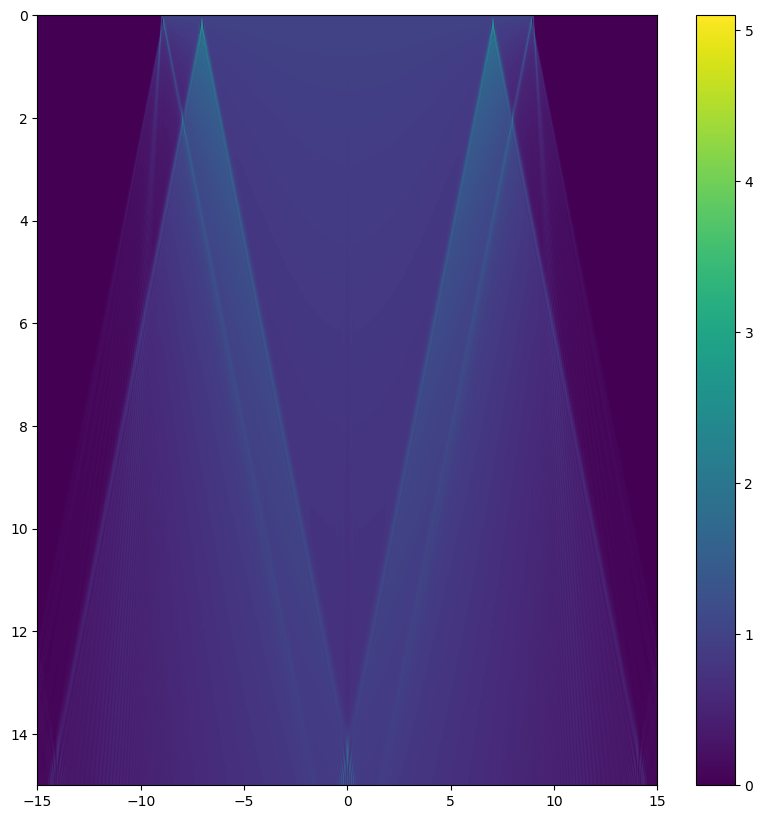

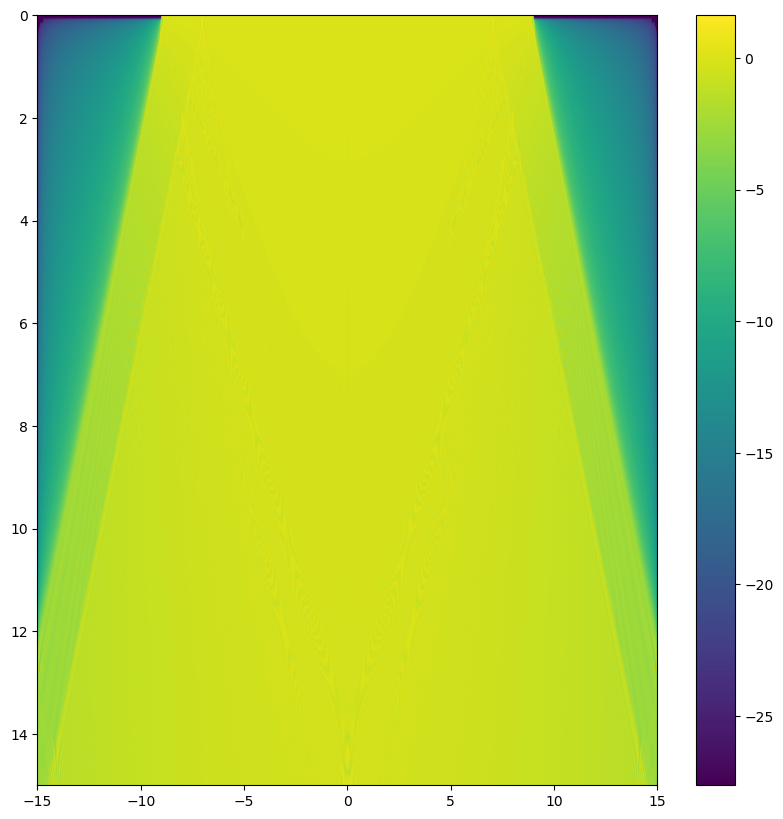

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [1142]:
extent = [-output_array2.shape[1]*pixel_size/2, output_array2.shape[1]*pixel_size/2, distances[-1], distances[0]]

plt.figure(figsize=(10,10))
plt.imshow(output_array2, aspect='auto', extent=extent)
plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(np.log(output_array2+1e-12), aspect='auto', extent=extent)
plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))


In [1143]:
wavefront_second = sim_tools.generate_lens_second_wavefront(lenses=padded_lenses, settings=settings, sim_settings=sim_settings)
start = 0
stop = 100
step = (stop-start)/(200-1)
distances = np.arange(start, stop, step)
distances = np.append(distances, stop)
print(f"Step: {step}")
output3, propagation3, output_array3 = sim_tools.propagate_second_lens(previous_wavefront=propagation2, wavefront=wavefront_second, settings=settings, distances=distances, sim_settings=sim_settings, pixel_size=pixel_size)


Step: 0.5025125628140703


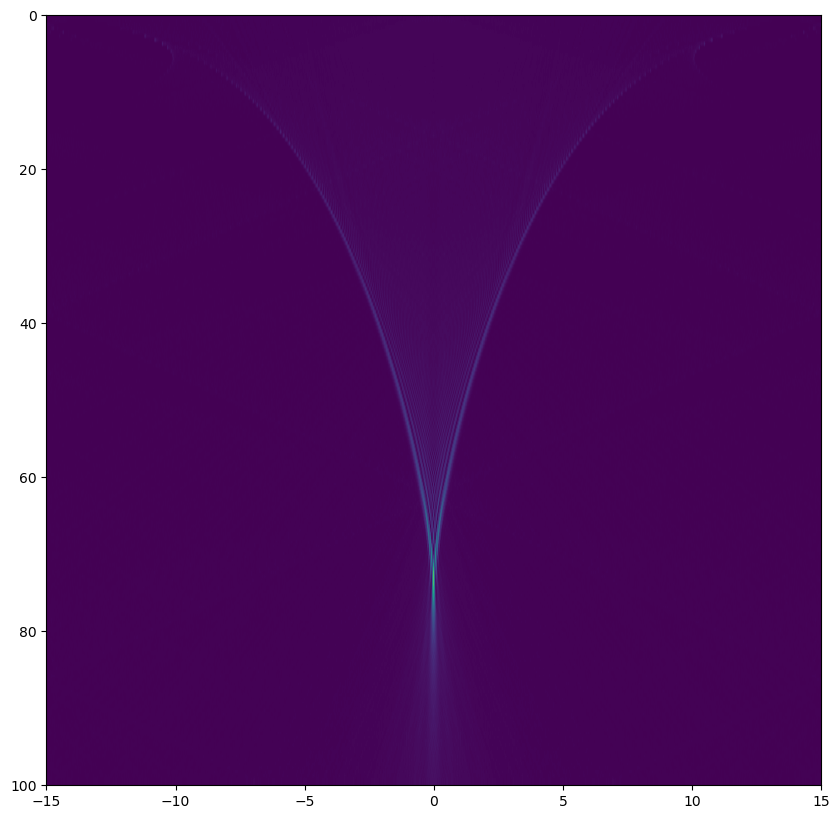

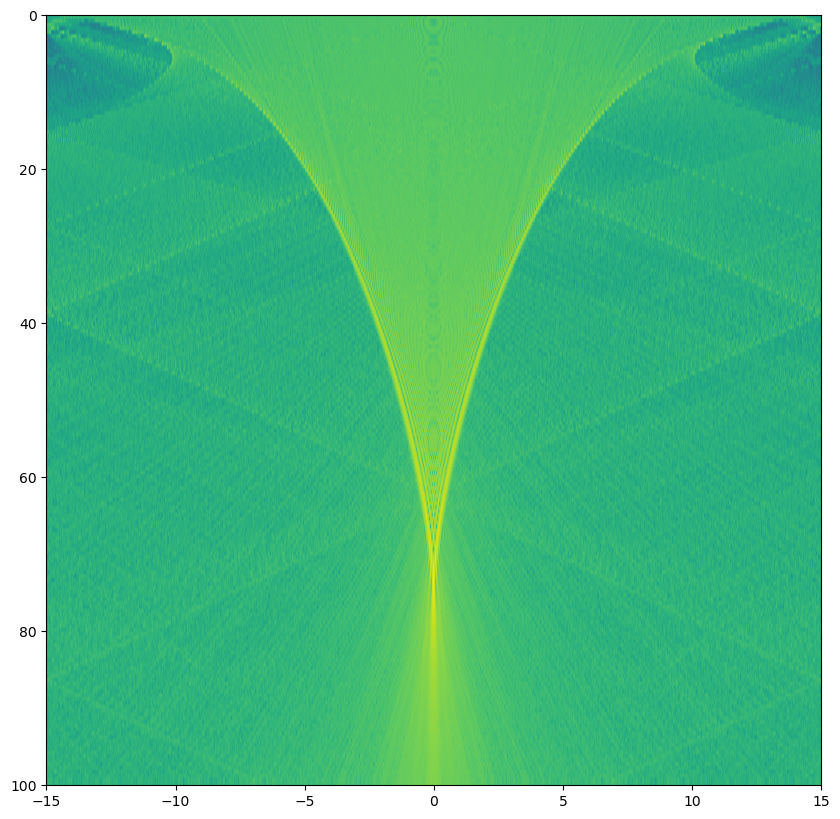

In [1144]:
extent = [-output_array3.shape[1]*pixel_size/2, output_array3.shape[1]*pixel_size/2, distances[-1], distances[0]]

plt.figure(figsize=(10,10))
plt.imshow(output_array3, aspect='auto', extent=extent)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(np.log(output_array3+1e-12), aspect='auto', extent=extent)
plt.show()